<a href="https://colab.research.google.com/github/skellig-ai/Fastai_intro/blob/main/Build_a_CNN_in_5_Lines.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Getting Started - Building Your First Neural Network


---

A neural network is a [universal approximation machine](https://en.wikipedia.org/wiki/Universal_approximation_theorem), in that it can find an approximation to any computable function if given enough parameters and enough data to learn from. Neural network have been applied to a wide range of problems including computer vision (CV), Natural Language Processing (NLP) and making predictions from Tabular datasets.

In this notebook we are going to obtain a small dataset containing images of rucksacks and handbags and use it to train a neural network to identify both rucksacks and handbags in just 3 lines of code. 

The goal of this notebook is to demonstrate the training process of a neural network and introduce you to some of the concepts surrounding neural networks and the syntax of the Fastai, a library for building neural network in python. At this stage we won't go into great depth explaining each concepts, but rather familiarise ourselves with their role. We'll delve into the each concept in greater detail in the following notebooks.

#This is a text cell

#1 Setting Up A Virtual Environment

---



## 1.1 Welcome to Colab

Colab is a virtual python notebook environment modelled largley on Jupyter Notebooks.

Colab comes as part of your Google account and gives you free access to GPU and TPU processors, making it much faster to train machine learning models than a CPU.

Colab provides a preconfigured environment which is easy to share with others without running into environment issues. However, we can (and will) make changes to the environment within the notebook. Another benefit of Colab is that any changes we make are also shared with anyone we've shared the notebook with.

### What is a Notebook?

A Notebook is a web application that allows you to create and share documents that contain live code, equations, visualizations and narrative text. Notebooks make it much easier to rapidly experiment and visualise data when you're working on data cleaning and transformation, statistical modeling, data visualization and machine learning.

If you're interested on finding out more about Colab follow this link: https://colab.research.google.com/notebooks/intro.ipynb

## 1.2 How do Notebooks work

Notebooks contain two types of cells, text cells (like the one your reading this text in) and code cells where you can write and execute lines of python code.

In the next code cell we define two variables a and b and multiply them together to create a new variable c.

In [ ]:
a = 2
b = 8
c = a*b

To run a cell and execute the code in a cell you can click the "play" buttom on the top left of the cell when your mouse hovers over it. But more commonly people use the keyboard shortcut **SHIFT+ENTER** instead to run a cell.

We can print an output from the cell underneath it by using python's built-in function print().

In [ ]:
print("a = {0}".format(a))
print("b = {0}".format(b))
print("c = {0}".format(c))

a = 2
b = 8
c = 16


In [ ]:
T = "testing cell output"
print(f"T: {T}")
a, b, c

T: testing cell output


(2, 8, 16)

Alternatively, if you type a variable at the end of a cell the value of that variable will be printed.

In [ ]:
a, b, c
t = 1

In [ ]:
"Here We print out a string at the end of a cell"

'Here We print out a string at the end of a cell'

## 1.3 Importing Fastai libraries

To build our neural network we need to import all the necessary packages. 

We are going to work with the [fastai V2 library](https://www.fast.ai/#fastai-v2) which sits on top of [Pytorch 1.0](https://hackernoon.com/pytorch-1-0-468332ba5163). 

The fastai library provides many useful functions that enable us to quickly and easily build neural networks and train our models.



*   **Main fastai documentation** is [https://docs.fast.ai](https://docs.fast.ai/)
*   **fastai.vision:** The vision module of the fastai library contains all the necessary functions to define a Dataset and train a model for computer vision tasks. Documentation is here: [https://docs.fast.ai/vision](https://docs.fast.ai/vision)


(*Since the Fastai V2 library has just been released, the default Colab environment hasn't yet been updated to include it. So in order to update from Fastai V1 to V2 run the following bash command*)

In [ ]:
!pip install fastai --upgrade
# !pip install fastcore==1.0.9

To get started with building image classifiers using fastai we will import the vision module from the fastai library.

In [ ]:
from fastai.vision.all import *

The following cell is a bash command to install the python package nbdev. This will allow us to use a very handy widget for viewing documentation on Fastai later.

In [ ]:
!pip install nbdev

# 2 Creating a Dataset

---


Before we can build our neural network we need to get a dataset. The following cells will download two files `rucksack.txt` and `handbags.txt` which contain URLs for images from two Google Images searches for "Rucksacks" and "Handbags". 

In this section we will:
* Download the .txt files from a [Github repository](https://github.com/skellig-ai/Bag_data).
* We will then download the images from each URL.
* Check url still contains an image.

If you're interested in seeing how the dataset was created [here](https://colab.research.google.com/drive/1M-g-W8J2bT3KVHXf-9APZu2YLl8nSIID?usp=sharing) is a notebook describing how to create your own dataset from Google images.

## 2.1 Downloading data
The following `wget` command will download the `.txt` files from the Github repository. We'll talk more about `wget` in the next notebook.

In [ ]:
!wget --header="Host: codeload.github.com" --header="User-Agent: Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/80.0.3987.122 Safari/537.36" --header="Accept: text/html,application/xhtml+xml,application/xml;q=0.9,image/webp,image/apng,*/*;q=0.8,application/signed-exchange;v=b3;q=0.9" --header="Accept-Language: en-US,en;q=0.9" --header="Referer: https://github.com/skellig-ai/Bag_data" --header="Cookie: _ga=GA1.2.1224040596.1510218932; _octo=GH1.1.125779994.1579782189; logged_in=yes; dotcom_user=skellig-ai; _gat=1" --header="Connection: keep-alive" "https://codeload.github.com/skellig-ai/Bag_data/zip/master" -O "Bag_data-master.zip" -c

--2022-03-25 12:23:09--  https://codeload.github.com/skellig-ai/Bag_data/zip/master
Resolving codeload.github.com (codeload.github.com)... 140.82.113.10
Connecting to codeload.github.com (codeload.github.com)|140.82.113.10|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: unspecified [application/zip]
Saving to: ‘Bag_data-master.zip’

Bag_data-master.zip     [ <=>                ]  30.30K  --.-KB/s    in 0.03s   

2022-03-25 12:23:09 (1.18 MB/s) - ‘Bag_data-master.zip’ saved [31028]



## 2.2 Using Bash commands in Colab
A useful feature of Colab notebooks is that bash commands can be passed by simply starting the command with !. 

The bash commands we will use in this course are:
* mv: Move directory
* rm: Delete directory
* unzip: Unzip a .zip folder
* mkdir: Make a new directory
* pip install: Python package installer

In [ ]:
!unzip Bag_data-master.zip

!mv Bag_data-master/rucksack.txt rucksack.txt
!mv Bag_data-master/handbag.txt handbag.txt

!rm -r Bag_data-master
!rm Bag_data-master.zip

unzip:  cannot find or open Bag_data-master.zip, Bag_data-master.zip.zip or Bag_data-master.zip.ZIP.
mv: cannot stat 'Bag_data-master/rucksack.txt': No such file or directory
mv: cannot stat 'Bag_data-master/handbag.txt': No such file or directory
rm: cannot remove 'Bag_data-master': No such file or directory
rm: cannot remove 'Bag_data-master.zip': No such file or directory


## 2.3 Creating a directory within Colab

As we download the images we will save them to a directories named rucksack and handbag respectively. This will make it easy for us to provide labels for each image during the training process, as the label for the image is the name of the directory where it was found.

We are going to use the a python `Path` object to handle the directory paths. We will discuss how these paths work in greater detail in a later notebook.

In [ ]:
path = Path('data')
path

Path('data')

In [ ]:
!mkdir data

mkdir: cannot create directory ‘data’: File exists


In [ ]:
!mv rucksack.txt data/rucksack.txt
!mv handbag.txt data/handbag.txt

mv: cannot stat 'rucksack.txt': No such file or directory
mv: cannot stat 'handbag.txt': No such file or directory


In [ ]:
!mkdir data/rucksack
!mkdir data/handbag

mkdir: cannot create directory ‘data/rucksack’: File exists
mkdir: cannot create directory ‘data/handbag’: File exists


In [ ]:
dest_1 = path/'rucksack'
file_1 = path/'rucksack.txt'

In [ ]:
dest_2 = path/'handbag'
file_2 = path/'handbag.txt'

## 2.4 Downloading images from URLs

Download images from their URLs using Fastai's `download_images` function.

The inputs we're passing to `download_images` are:
*   The path for the .txt file which contains the URLs for the images.
*   The path for the destination of the downloaded images.


You can find the documentation for `download_images` [here](https://docs.fast.ai/vision.utils#download_images)

If a URL is broken you'll see a error message printed, you can ignore this as there are enough working URLs to make up our dataset.

In [ ]:
download_images(dest_1, file_1, max_pics=400)
download_images(dest_2, file_2, max_pics=400)

In [ ]:
help(download_images)

Help on function download_images in module fastai.vision.utils:

download_images(dest, url_file=None, urls=None, max_pics=1000, n_workers=8, timeout=4, preserve_filename=False)
    Download images listed in text file `url_file` to path `dest`, at most `max_pics`



We can view the docs for any function in the notebook using the `doc` function.

In [ ]:
doc(download_images)

,Type,Default
dest,,
url_file,NoneType,``
urls,NoneType,``
max_pics,int,1000
n_workers,int,8
timeout,int,4
preserve_filename,bool,False


## 2.5 Verifying images
Having downloaded the images from the URLs some of the paths may still be broken for one reason or another. The `verify_images` function takes the path of the downloaded files and checks that they contain images and deletes if they don't. The documentation for `verify_images` can be found [here](https://docs.fast.ai/vision.data.html#verify_images).

First we need to get a list of all the image paths. `get_image_files` is useful for that.

In [ ]:
path

Path('data')

In [ ]:
fns = get_image_files(path)
for file_name in fns[:5]:
  print(file_name)

data/rucksack/00000171.jpg
data/rucksack/00000157.jpg
data/rucksack/00000084.jpg
data/rucksack/00000227.jpg
data/rucksack/00000098.jpg


In [ ]:
len(fns)

485

The `verify_images` function take a list of image paths and returns the paths that are not valid image files as a object.

In [ ]:
failed = verify_images(fns)

In [ ]:
failed

(#0) []

The following cell removes the files listed in the failed objected using the `Path.unlink` function.

In [ ]:
failed.map(Path.unlink)

Error in atexit._run_exitfuncs:
Traceback (most recent call last):
  File "/usr/lib/python3.7/concurrent/futures/process.py", line 102, in _python_exit
    thread_wakeup.wakeup()
  File "/usr/lib/python3.7/concurrent/futures/process.py", line 90, in wakeup
    self._writer.send_bytes(b"")
  File "/usr/lib/python3.7/multiprocessing/connection.py", line 183, in send_bytes
    self._check_closed()
  File "/usr/lib/python3.7/multiprocessing/connection.py", line 136, in _check_closed
    raise OSError("handle is closed")
OSError: handle is closed


In [ ]:
help(map)

You see what the `verify_images` function does here:

In [ ]:
help(verify_images)

And what the `Path.unlink`function does here:

In [ ]:
help(Path.unlink)

Finally, in order to train a model on this dataset we need to convert any transparency that might exist in PNG files to RGB data.

In [ ]:
fns = get_image_files(path)
len(fns)

In [ ]:
for file in fns:
  Image.open(file).convert('RGB').save(file, 'JPEG')

# 3 Creating A Image Clasifier:


---

Now that we have created a dataset we want to use it to train a neural network to identify images that have either handbags or rucksacks to about 93% accuracy.

with the Fastai V2 library this can be achieved with just three lines of code:


1.   Line 1 sets the image augmations parameters.
2.   Line 2 will load the data into a format that can easily be passed to a neural network for training.
3.   Line 3 will define our neural network architecture.
4.   Line four finds a suitable learning rate.
5.   Line 3 will train the neural network.



##3.1 Line 1: Data Augmentation - Extending Your Dataset


Collecting large datasets can always be a challenge. Sometimes it helps to use Data Augmentation, meaning we apply a function to each image to slightly change it (i.e. it augments or transforms the image), to create a bigger dataset for example. Fastai's data augmentation function aug_transforms() can preform a number of transformations inlcuding,

*    Flipping on both the horizontal and vertical axes.
*    Rotation
*    Adjust brightness
*   Adjust Contrast

### Augmenting by rotation

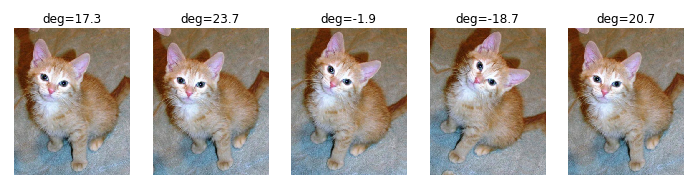

### Augmentation by adjusting brightness
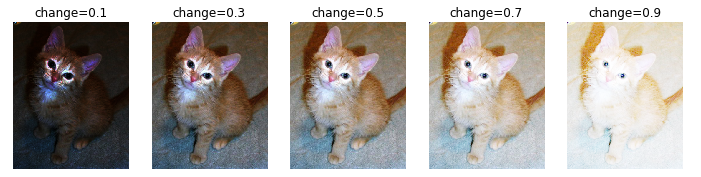

### Augmentation by adjusting contrast
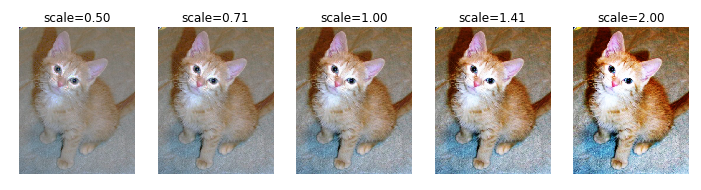

For more information about data augmentation check out this Towards Data Science [article](https://towardsdatascience.com/data-augmentation-for-deep-learning-4fe21d1a4eb9).

You can find what types of augmentation are available with the `aug_transforms` function in the [documentation](https://docs.fast.ai/vision.augment#aug_transforms) and choose the ones that are appropriate for our dataset.

We define the object `tfms` to indicate which transforms are to be used on the MNIST images. Obviously most numbers can't really be flipped, therefore we disallow flipping. 

In [ ]:
tfms = aug_transforms(do_flip=False)

In [ ]:
help(aug_transforms)

Help on function aug_transforms in module fastai.vision.augment:

aug_transforms(mult=1.0, do_flip=True, flip_vert=False, max_rotate=10.0, min_zoom=1.0, max_zoom=1.1, max_lighting=0.2, max_warp=0.2, p_affine=0.75, p_lighting=0.75, xtra_tfms=None, size=None, mode='bilinear', pad_mode='reflection', align_corners=True, batch=False, min_scale=1.0)
    Utility func to easily create a list of flip, rotate, zoom, warp, lighting transforms.



## 3.2 Line 2: Loading our dataset

Fastai has a specific class, called `DataLoader`s, for handling data and preforming various preprocessing operations to the data before training. We'll discuss the concept of the `DataLoader` and the preprocessing steps it includes at in later notebooks. For now it is enough to understand that it is the class that contains our dataset.

In [ ]:
dls = ImageDataLoaders.from_folder(path, valid_pct=0.2, item_tfms=Resize(224), batch_tfms=tfms)

In [ ]:
doc(ImageDataLoaders.from_folder)

## 3.3 Line 3: Defining our neural network

In the following cell we will define our "learner". The learner is a Fastai object that contains the data bunch, the neural networks architecture and metrics we use to monitor the model's progress during training.

The method we use to define the learner object here is `cnn_learner`, you can find the documentation for this method [here](https://docs.fast.ai/vision.learner.html#cnn_learner). A CNN neural network is a specific type of architecture that is extremely well suited for computer vision problems. We'll discuss the CNN architecture in greater detail later, or you can read more about it [here](https://towardsdatascience.com/a-comprehensive-guide-to-convolutional-neural-networks-the-eli5-way-3bd2b1164a53).

Throughout this course we will be using some of the most common open source neural network architectures. In this example we will use [ResNet34](https://towardsdatascience.com/understanding-and-visualizing-resnets-442284831be8).

In [ ]:
learn = cnn_learner(dls, resnet34, metrics=accuracy)

In [ ]:
help(learn)

##3.4 Line 4: Finding a Learning Rate

One of the difficulties around neural networks has been tuning the hyperparameters of the model. For our convenience the team at Fast.ai have established excellent default hyperparameters that work really well for most problems. However, the one hyper parameter which still needs user tuning is the [Learning Rate](https://en.wikipedia.org/wiki/Learning_rate). You can find an anylsis on the effectiveness of Fastai's default hyperparameters [here](https://platform.ai/blog/page/1/optimizing-hyperparams-for-image-datasets-in-fastai/).

To handle the learning rate, the Fastai library provides a function called `lr_ find()` to easily find an effective learning rate. The function is based on the work of Leslie Smith, which you can find [here](https://arxiv.org/pdf/1506.01186.pdf).
You can find the documentation for `lr_ find()` [here](https://docs.fast.ai/basic_train.html#lr_find).

SuggestedLRs(valley=0.0014454397605732083)

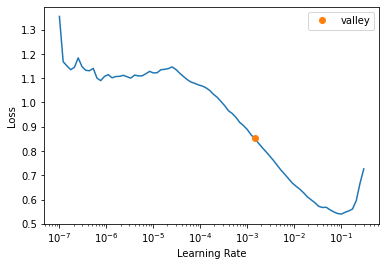

In [ ]:
learn.lr_find()

### How to Choose the Learning Rate

Given our current configuration, it is likely that the graph generated by the learning rate finder reaches minimum loss value around learning rate 2e-01, before the loss begins to increase again with further increasing learning rates.

Choosing the minimum point on the curve generally isn't recommended, because the rapid increase in the loss tends to start to the right of that point.

The `lr_find()` function returns two potential candidates, based on two useful rules of thumb to choose the learning rate, which often agree with each other:

1.   Where is the slope of the curve is at its greatest, to the left of the minimum. In the LR Finder plot above, this corresponds to values between 5e-03 and 5e-02.
2.   From the minimum point on the curve count back between 5 and 10 notches on the x axis. In the LR Finder plot above, this corresponds to 7e-02 and 2e-02.

**For this experiment, we'll choose a learning rate of 3e-02.**


## 3.5 Line 5: Training your Neural Network

The final step now is to train our model. In Fastai we do this by calling a method attributed to our learner called `learn.fit_one_cycle`, you can find the documentation [here](https://docs.fast.ai/basic_train.html#fit_one_cycle). In this example you'll see that we are passing the value 5 into our learner, as we are telling the learner to train for 5 epochs. Essentially this is saying to our learner to run through our entire dataset 5 times.

In [ ]:
learn.fit_one_cycle(5,lr_max=1e-3)

epoch,train_loss,valid_loss,accuracy,time
0,1.017366,0.374772,0.814433,00:14
1,0.693983,0.338603,0.865979,00:13
2,0.516403,0.206213,0.896907,00:13
3,0.397845,0.214542,0.917526,00:13
4,0.349340,0.217880,0.938144,00:13


In [ ]:
learn.predict()

# Layer Types:


We can look at the architecture of the model using the `learn.summary()` method.

In [ ]:
learn.summary()

Sequential (Input shape: 64 x 3 x 224 x 224)
Layer (type)         Output Shape         Param #    Trainable 
                     64 x 64 x 112 x 112 
Conv2d                                    9408       False     
BatchNorm2d                               128        True      
ReLU                                                           
____________________________________________________________________________
                     64 x 64 x 56 x 56   
MaxPool2d                                                      
Conv2d                                    36864      False     
BatchNorm2d                               128        True      
ReLU                                                           
Conv2d                                    36864      False     
BatchNorm2d                               128        True      
Conv2d                                    36864      False     
BatchNorm2d                               128        True      
ReLU                      

* **Conv2d**: 2D Convolutional layer, [Docs](https://pytorch.org/docs/stable/generated/torch.nn.Conv2d.html).
* **BatchNorm2d**: Normalises the activations at this layer, [Docs](https://pytorch.org/docs/stable/generated/torch.nn.BatchNorm2d.html).
* **ReLU**: Applies the rectified linear unit function element-wise, [Docs](https://pytorch.org/docs/stable/generated/torch.nn.ReLU.html).
* **MaxPool2d**: Selects the maximum value of a 2x2 matrix, halving the height and width of the parent tensor, [Docs](https://pytorch.org/docs/stable/generated/torch.nn.MaxPool2d.html).
* **AdaptiveAvgPool2d**: Average pooling layer that can adapt to input size, [Docs](https://pytorch.org/docs/stable/generated/torch.nn.AdaptiveAvgPool2d.html).
* **AdaptiveMaxPool2d**: Max pooling layer that can adapt to input size, [Docs](https://pytorch.org/docs/stable/generated/torch.nn.AdaptiveMaxPool2d.html).
* **Flatten**: Flattens the multi-dimensional data into a NxM tensor, [Docs](https://pytorch.org/docs/stable/generated/torch.nn.Flatten.html).
* **Dropout**: Randomly turns off some of the activations to help regularisation. [Docs](https://pytorch.org/docs/stable/generated/torch.nn.Dropout.html)
* **BatchNorm1d**: Normalises the activations at this layer, [Docs](https://pytorch.org/docs/stable/generated/torch.nn.BatchNorm1d.html).
* **Linear**: Applies a linear transformation to the incoming data, [Docs](https://pytorch.org/docs/stable/generated/torch.nn.Linear.html)

In [ ]:
doc(cnn_learner)

,Type,Default,Details
dls,,,No Content
arch,,,No Content
normalize,bool,True,No Content
n_out,NoneType,``,No Content
pretrained,bool,True,No Content
config,NoneType,``,No Content
loss_func,NoneType,``,No Content
opt_func,function,Adam,No Content
lr,float,001,No Content
splitter,NoneType,``,No Content
